In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter
import anndata as ad
import seaborn as sns
import pandas as pd
from sklearn.metrics import calinski_harabasz_score

/opt/anaconda3/envs/scvi-env-arm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
exp_id = "exp5"

In [3]:
adata_input_dir = f"/Users/apple/Desktop/KB/data/LarryData/Larry_simulation/Larry_simulation_4scvi/{exp_id}"
#simulation data
adata_01 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim01_{exp_id}.h5ad')
lineage_label_01 = adata_01.obs["clone_id"].to_numpy()

adata_03 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim03_{exp_id}.h5ad')
lineage_label_03 = adata_03.obs["clone_id"].to_numpy()

adata_05 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim05_{exp_id}.h5ad')
lineage_label_05 = adata_05.obs["clone_id"].to_numpy()

adata_07 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim07_{exp_id}.h5ad')
lineage_label_07 = adata_07.obs["clone_id"].to_numpy()

adata_09 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim09_{exp_id}.h5ad')
lineage_label_09 = adata_09.obs["clone_id"].to_numpy()

In [4]:
adata_01.obs['Cell type annotation'] = adata_01.obs["state_info"]
adata_03.obs['Cell type annotation'] = adata_03.obs["state_info"]
adata_05.obs['Cell type annotation'] = adata_05.obs["state_info"]
adata_07.obs['Cell type annotation'] = adata_07.obs["state_info"]
adata_09.obs['Cell type annotation'] = adata_09.obs["state_info"]

In [6]:
input_dir = f"/Users/apple/Desktop/KB/data/feat_simulation/scvi_sim_result/{exp_id}"
output_dir = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/out/plot/feat_simulation"

# scVI
x_005_01 = np.load(input_dir+f"/scVI/Larry_scvi_sim_01_{exp_id}.npy")
x_005_03 = np.load(input_dir+f"/scVI/Larry_scvi_sim_03_{exp_id}.npy")
x_005_05 = np.load(input_dir+f"/scVI/Larry_scvi_sim_05_{exp_id}.npy")
x_005_07 = np.load(input_dir+f"/scVI/Larry_scvi_sim_07_{exp_id}.npy")
x_005_09 = np.load(input_dir+f"/scVI/Larry_scvi_sim_09_{exp_id}.npy")

#scCL

x_CL_01 = np.load(input_dir+f"/scCL/Larry_scCL_sim_01_{exp_id}.npy")
x_CL_03 = np.load(input_dir+f"/scCL/Larry_scCL_sim_03_{exp_id}.npy")
x_CL_05 = np.load(input_dir+f"/scCL/Larry_scCL_sim_05_{exp_id}.npy")
x_CL_07 = np.load(input_dir+f"/scCL/Larry_scCL_sim_07_{exp_id}.npy")
x_CL_09 = np.load(input_dir+f"/scCL/Larry_scCL_sim_09_{exp_id}.npy")


### Calinski Scores

In [7]:
# scVI
score_005_01 = calinski_harabasz_score(x_005_01, lineage_label_01)
score_005_03 = calinski_harabasz_score(x_005_03, lineage_label_03)
score_005_05 = calinski_harabasz_score(x_005_05, lineage_label_05)
score_005_07 = calinski_harabasz_score(x_005_07, lineage_label_07)
score_005_09 = calinski_harabasz_score(x_005_09, lineage_label_09)

# scCL
score_CL_01 = calinski_harabasz_score(x_CL_01, lineage_label_01)
score_CL_03 = calinski_harabasz_score(x_CL_03, lineage_label_03)
score_CL_05 = calinski_harabasz_score(x_CL_05, lineage_label_05)
score_CL_07 = calinski_harabasz_score(x_CL_07, lineage_label_07)
score_CL_09 = calinski_harabasz_score(x_CL_09, lineage_label_09)

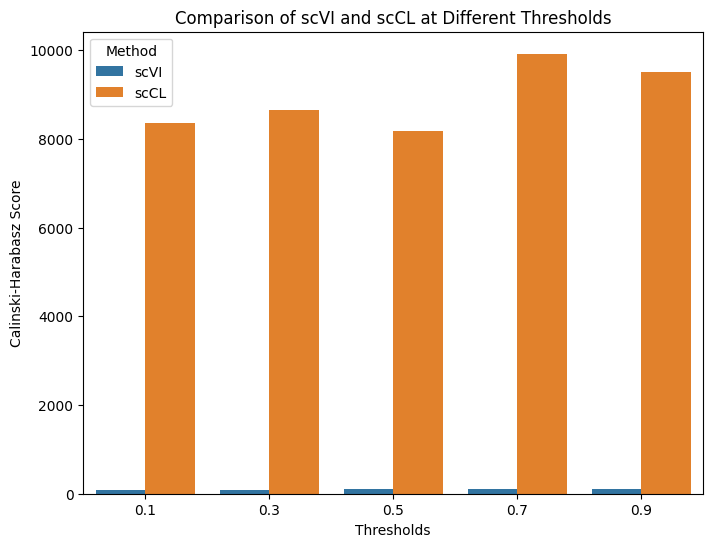

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for plotting
data = {
    'Thresholds': [0.1, 0.3, 0.5, 0.7, 0.9] * 2,
    'Score': [score_005_01, score_005_03, score_005_05, score_005_07, score_005_09,score_CL_01, score_CL_03, score_CL_05, score_CL_07, score_CL_09],  # Replace with actual scCL scores
    'Method': ['scVI'] * 5 + ['scCL'] * 5
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Thresholds', y='Score', hue='Method', data=df)

plt.title('Comparison of scVI and scCL at Different Thresholds')
plt.xlabel('Thresholds')
plt.ylabel('Calinski-Harabasz Score')
plt.legend(title='Method')
plt.show()


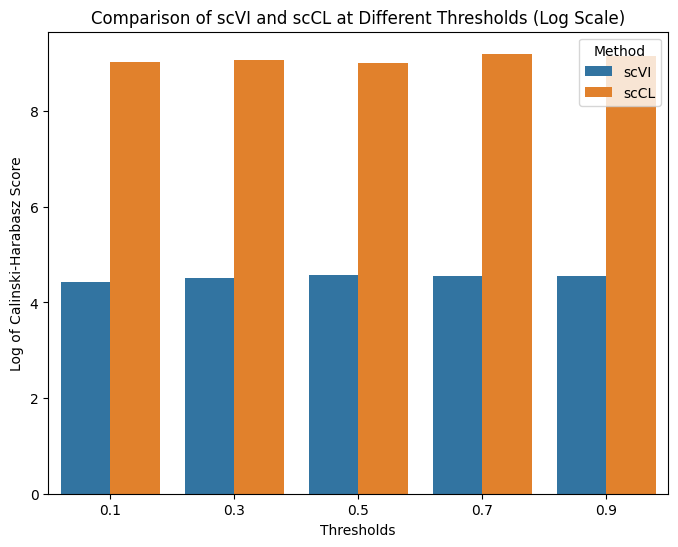

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for plotting
data = {
    'beta(level of difficulity)': [0.1, 0.3, 0.5, 0.7, 0.9] * 2,
    'Score': [
        np.log(score_005_01), np.log(score_005_03), np.log(score_005_05), np.log(score_005_07), np.log(score_005_09),
        np.log(score_CL_01), np.log(score_CL_03), np.log(score_CL_05), np.log(score_CL_07), np.log(score_CL_09)
    ],  # Replace with actual scores
    'Method': ['scVI'] * 5 + ['scCL'] * 5
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='beta(level of difficulity)', y='Score', hue='Method', data=df)

plt.title('Comparison of scVI and scCL at Different Thresholds (Log Scale)')
plt.xlabel('Thresholds')
plt.ylabel('Log of Calinski-Harabasz Score')
plt.legend(title='Method')
plt.show()


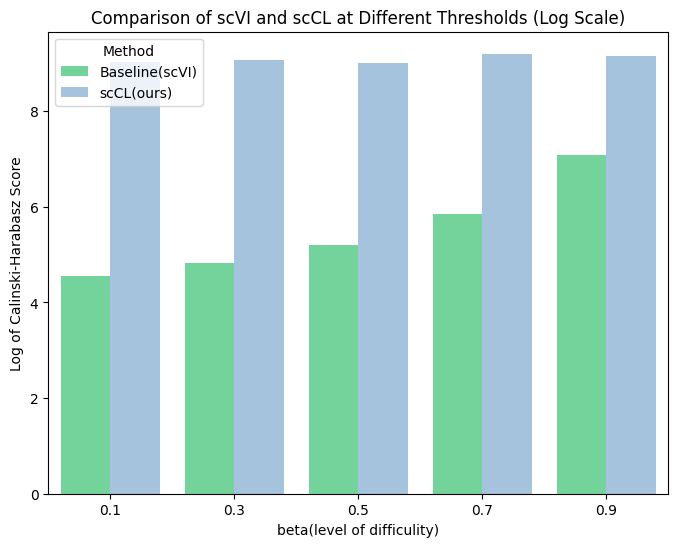

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for plotting
data = {
    'beta(level of difficulty)': [0.1, 0.3, 0.5, 0.7, 0.9] * 2,
    'Score': [
        np.log(95.23), np.log(125.44), np.log(182.9), np.log(347.18), np.log(1203.83),
        np.log(score_CL_01), np.log(score_CL_03), np.log(score_CL_05), np.log(score_CL_07), np.log(score_CL_09)
    ],  # Replace with actual scores
    'Method': ['Baseline(scVI)'] * 5 + ['scCL(ours)'] * 5
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='beta(level of difficulty)', y='Score', hue='Method', data=df, palette=["#63E398", "#9DC3E7"])

plt.title('Comparison of scVI and scCL at Different Thresholds (Log Scale)')
plt.xlabel('beta(level of difficulity)')
plt.ylabel('Log of Calinski-Harabasz Score')
plt.legend(title='Method')
plt.show()


/var/folders/ql/mhz506t52bjgn30w6f4wqhv40000gn/T/ipykernel_12803/1667529212.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Method')


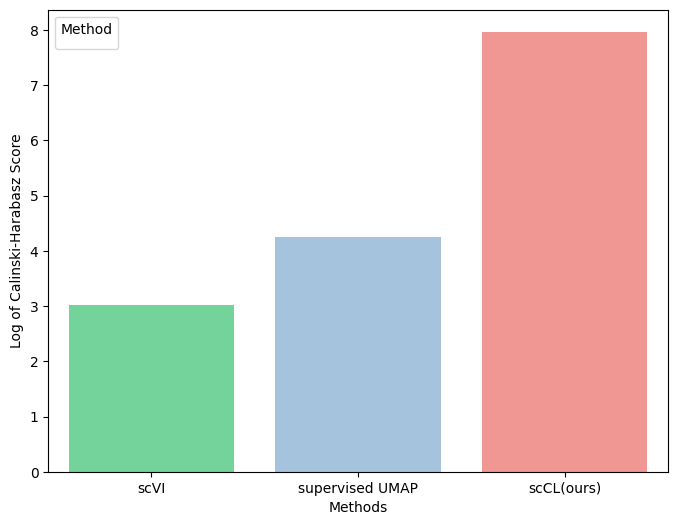

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for plotting
data = {
    'Method': ["scVI", "supervised UMAP", "scCL(ours)"],
    'Score': [np.log(20.34), np.log(70.48), np.log(2886.6)]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='Score', hue='Method', data=df, palette=["#63E398", "#9DC3E7", "#FF8884"])

# plt.title('Comparison of scVI and scCL at Different Thresholds (Log Scale)')
plt.xlabel('Methods')
plt.ylabel('Log of Calinski-Harabasz Score')
plt.legend(title='Method')
plt.show()


/var/folders/ql/mhz506t52bjgn30w6f4wqhv40000gn/T/ipykernel_12803/1531603379.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Method')


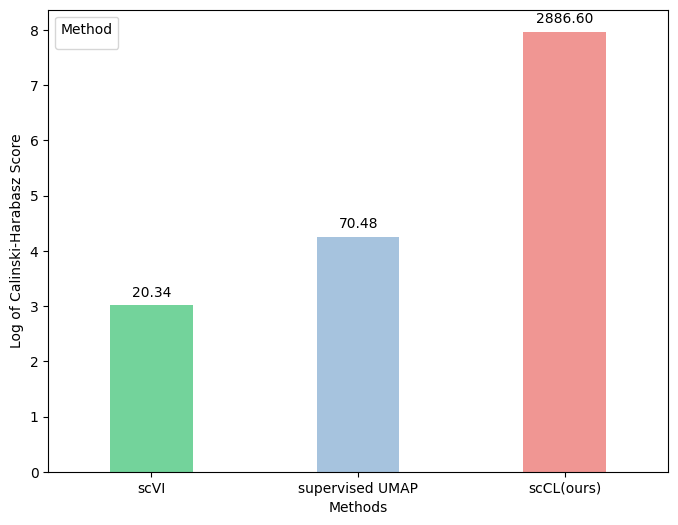

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for plotting
data = {
    'Method': ["scVI", "supervised UMAP", "scCL(ours)"],
    'Score': [np.log(20.34), np.log(70.48), np.log(2886.6)]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Method', y='Score', hue='Method', data=df, palette=["#63E398", "#9DC3E7", "#FF8884"], width=0.4)

# Annotate the bars with the actual scores
for i, score in enumerate(data['Score']):
    ax.text(i, score + 0.1, f'{np.exp(score):.2f}', ha='center', va='bottom')

plt.xlabel('Methods')
plt.ylabel('Log of Calinski-Harabasz Score')
plt.legend(title='Method')
plt.show()


/var/folders/ql/mhz506t52bjgn30w6f4wqhv40000gn/T/ipykernel_12803/3684285746.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Method')


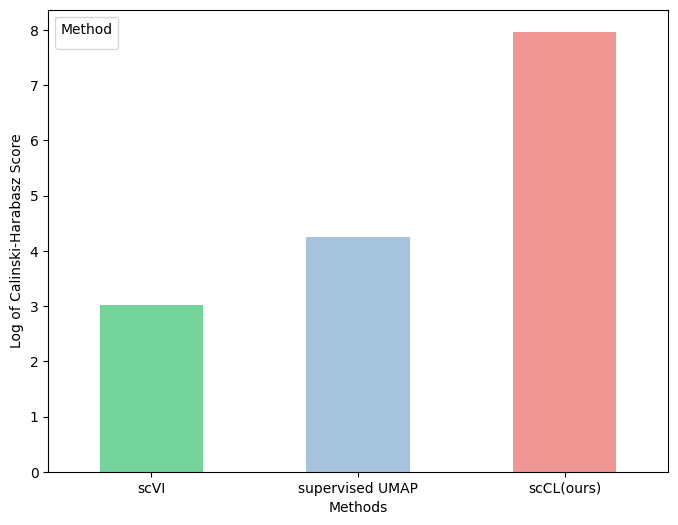

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for plotting
data = {
    'Method': ["scVI", "supervised UMAP", "scCL(ours)"],
    'Score': [np.log(20.34), np.log(70.48), np.log(2886.6)]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='Score', hue='Method', data=df, palette=["#63E398", "#9DC3E7", "#FF8884"], width=0.5)

plt.xlabel('Methods')
plt.ylabel('Log of Calinski-Harabasz Score')
plt.legend(title='Method')
plt.show()


In [ ]:
score_005_01, score_005_03, score_005_05, score_005_07, score_005_09,score_CL_01, score_CL_03, score_CL_05, score_CL_07, score_CL_09

In [ ]:
# Combine the scores
# scores = [score_005_09, score_005_07, score_005_05, score_005_03, score_005_01]
scores = [score_005_01, score_005_03, score_005_05, score_005_07, score_005_09]
# labels = [ '51', '201', '388', '587', '776']
# labels = [ '0.1', '0.3', '0.5', '0.7', '0.9']
labels = [ '0.03', '0.05', '0.07', '0.09', '0.11']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, scores, color='skyblue')

# Adding the scores on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Beta')
# plt.xlabel('number of lineages')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for Different Simulation Parameters')
plt.show()